In [ ]:
#importing all necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import warnings
import math
warnings.filterwarnings("ignore")   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import log10

In [ ]:
#to upload dataset file
from google.colab import files
file=files.upload()

Saving tic-tac-toe.csv to tic-tac-toe (1).csv


In [ ]:
 df = pd.read_csv("tic-tac-toe.csv")       #read dataset using pd.read_csv
 df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
#decode categorial values to numeric values
le_obj = LabelEncoder()
for i in df.columns:
  df[i]=le_obj.fit_transform(df[i])              
attributes = list(df.columns)  #creating the list with df.coloumns
attributes.remove('class')
X = df[attributes].values.astype(np.float32) #input dataset
y = df['class']     #output dataset
s=StandardScaler()
X=s.fit_transform(X)
#spliting the dataset to test and train data 
#Setting random_state a fixed value will guarantee that same sequence of text and train datasets will be generated everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=21)

In [ ]:
#definition of class SGDClassifier:
class SGDClassifier():
  def fit(self,X_train,X_test,y_train,y_test,n,w,b):
    del_w=np.zeros_like(X_train[0])
    del_b=0
    wl=[]
    bl=[]
    log_loss_train=[]
    log_loss_test=[]
    #Stochastic gradient descent
    for epoch in range(n):
        for m in range(1000):
            i = np.random.choice(len(X_train))
            del_w=del_w+X_train[i]*(y_train[i]-self.sigmoid(w,X_train[i],b))
            del_b=del_b+(y_train[i]-self.sigmoid(w,X_train[i],b)) 
        # update parameters
        w=(1-(alpha/n))*w+alpha*del_w
        b=b+alpha*del_b
        wl.append(w)
        bl.append(b)
        log_loss_train.append(self.compute_log_loss(y_train,self.sig_pred(w,X_train,b)))
        log_loss_test.append(self.compute_log_loss(y_test,self.sig_pred(w,X_test,b)))
    #graph for Log loss vs epoch
    %matplotlib inline
    plt.plot(log_loss_train, label='train_log_loss')
    plt.plot(log_loss_test, label='test_log_loss')
    plt.grid()
    plt.legend()
    plt.title('Log loss vs epoch')
    plt.xlabel('Iterations')
    plt.ylabel('log loss')
    plt.show() 
    return log_loss_train,log_loss_test,wl,bl
  def sigmoid(self,w,x,b):
    return 1/(1+math.exp(-(np.dot(x,w)+b))) 
  def sig_pred(self,w,X,b):
    a=[]
    for x in X:
      a.append(self.sigmoid(w,x,b))#a.append(1/(1+math.exp(-(np.dot(x,w)+b))))
    return a    
  def compute_log_loss(self,A,B):
     n = len(A)
     res = 0
     for l in zip(A,B):
         res += l[0] * log10(l[1]) + (1 - l[0]) * log10(1 - l[1])                   
     loss = (-1 * res) / n
     return loss
  def predict(self,w,b, X):
    N = len(X)
    predictions = []
    for i in range(N):
        if self.sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predictions.append(1)               #class 1-->positive-->X wins game else O
        else:
            predictions.append(0)
    return np.array(predictions)


In [ ]:
#initialize weight and bias
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
#create object of SGDClassifier class
model=SGDClassifier()
print("the initial train loss is :" ,model.compute_log_loss(y_train,model.sig_pred(w,X_train,b))," at W:",w,"  and b :",b)  #initial log loss
print("the initial test loss is :" ,model.compute_log_loss(y_test,model.sig_pred(w,X_test,b))," at W:",w,"  and b :",b)

the initial train loss is : 0.3010299956639812  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0
the initial test loss is : 0.3010299956639812  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0


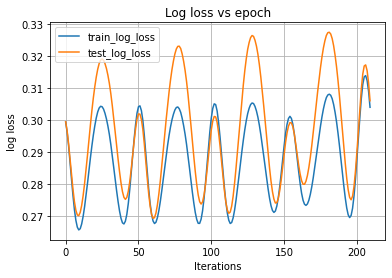

In [ ]:
logloss_train,logloss_test,W,B=model.fit(X_train,X_test,y_train,y_test,210,w,b)  #train phase

In [ ]:
from sklearn.metrics import accuracy_score
ind = np.argmin(logloss_train)
ind_t=np.argmin(logloss_test)
y_pred=model.predict(W[ind],B[ind],X_test) #get predictions
print("\nThe test accuracy Score with scratch is : ", accuracy_score(y_test,y_pred))      #calculate accuracy score


The test accuracy Score with scratch is :  0.6683168316831684


In [ ]:
#Inbuilt classifier from sklearn
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001,loss='log',  random_state=123,learning_rate='optimal')
clf.fit(X=X_train, y=y_train)
print("\nThe test accuracy Score with inbuilt is: ",clf.score(X_test,y_test))
y_pred1=clf.predict(X_test)
#print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))


The test accuracy Score with inbuilt is:  0.6732673267326733
0.6732673267326733


In [ ]:
#accuracy scores from both models
print("\nThe test accuracy Score with scratch is : ", accuracy_score(y_test,y_pred))
print("\nThe test accuracy Score with inbuilt is: ",clf.score(X_test,y_test))


The test accuracy Score with scratch is :  0.6683168316831684

The test accuracy Score with inbuilt is:  0.6732673267326733


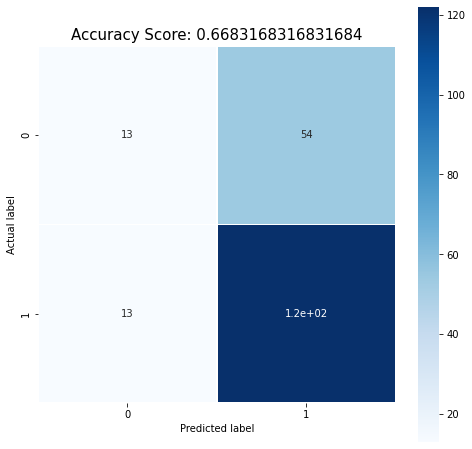

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.52      0.19      0.28        67
         1.0       0.69      0.91      0.79       135

    accuracy                           0.67       202
   macro avg       0.61      0.55      0.54       202
weighted avg       0.64      0.67      0.62       202

